<a href="https://colab.research.google.com/github/YashSharma79/Bron-Kerbosch/blob/main/Bron_Kerbosch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import networkx as nx
import matplotlib.pyplot as plt 
import random

# Basic Bron-Kerbosch algorithm

In [ ]:
def BronKerbosch(R, P, X):
  if len(P) == 0 and len(X) == 0:
    #R is a clique
    clique_finder.density_to_cliques_1[clique_finder.density] += 1
    return

  for v in P:
    v_set = set()
    v_set.add(v)
    BronKerbosch(R | v_set, P & set(clique_finder.G[v]), X & set(clique_finder.G[v]))
    P = P - v_set
    X = X | v_set
  return clique_finder.density_to_cliques_1[clique_finder.density]

# Bron Kerbosch with pivot

In [ ]:
def BronKerboschWithPivot(R, P, X):
  if len(P) == 0 and len(X) == 0:
    #clique_finder.density_to_cliques_2[clique_finder.density] += 1
    #print(R)
    return

  #choose a pivot vertex u in P ⋃ X
  u = 0
  #take first element as pivot
  #note that though this is a loop, it only executes once
  #because we just choose the first element as pivot
  for pivot in P | X:
    u = pivot
    break

  for v in (P - set(clique_finder.G[u])):
    v_set = set()
    v_set.add(v)
    BronKerboschWithPivot(R | v_set, P & set(clique_finder.G[v]), X & set(clique_finder.G[v]))
    P = P - v_set
    X = X | v_set


# Generate graphs and test

In [ ]:
class CliqueFinder:
  def __init__(self):
    self.density_to_cliques_1 = {}
    self.density_to_cliques_2 = {}
    self.density_to_time1 = {}
    self.density_to_time2 = {}
    self.density = 0
    self.G = nx.erdos_renyi_graph(100, self.density)

clique_finder = CliqueFinder()

def plotter(valueMap, labelX, labelY, name, colour):
  myList = valueMap.items()
  x, y = zip(*myList)
  plt.title(name)
  #plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9 , 1.0])
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  #plt.locator_params(axis='y', nbins=6)
  plt.plot(x, y, marker = 'o', color = colour)
  plt.savefig(str(name))
  plt.show()

def compareBronKerbosch(initial_density, final_density):
  clique_finder.density = initial_density
  num_of_graphs = 10
  while clique_finder.density <= final_density:
    print('Current density = ', clique_finder.density)
    #10 graphs of each density
    for i in range(0, num_of_graphs):
      clique_finder.G = nx.erdos_renyi_graph(20, clique_finder.density)
      
      #nx.draw(G, with_labels = True)
      #plt.show()

      X, R = set(), set() 
      P = set(clique_finder.G.nodes)
      print(clique_finder.G)

      #initialise nun_of_cliques_by_density
      if clique_finder.density_to_cliques_1.get( clique_finder.density) is None:
        clique_finder.density_to_cliques_1[clique_finder.density] = 0
        clique_finder.density_to_cliques_2[clique_finder.density] = 0
        clique_finder.density_to_time1[clique_finder.density] = 0
        clique_finder.density_to_time2[clique_finder.density] = 0

      start_time = time.time()
      print("Bron Kerbosch")
      cliques_found = BronKerbosch(R, P, X)
      print('Found ', cliques_found)
      clique_finder.density_to_time1[clique_finder.density] += (time.time() - start_time)
      print("--- %s seconds ---" % (time.time() - start_time))
      print("- - - - - - - - - ")

      X, R = set(), set() 
      P = set(clique_finder.G.nodes)

      start_time = time.time()
      print("Bron Kerbosch with pivot")
      print('Found ', cliques_found)
      cliques_found = BronKerboschWithPivot(R, P, X)
      clique_finder.density_to_time2[clique_finder.density] += (time.time() - start_time)

      print("--- %s seconds ---" % (time.time() - start_time))
      print("_______________________________________")

    #take average
    print('BK 1 =', clique_finder.density_to_cliques_1[clique_finder.density])
    print('BK 2 =', clique_finder.density_to_cliques_2[clique_finder.density])

    clique_finder.density_to_cliques_1[clique_finder.density] /= num_of_graphs
    clique_finder.density_to_cliques_2[clique_finder.density] /= num_of_graphs
    clique_finder.density_to_time1[clique_finder.density]  /= num_of_graphs
    clique_finder.density_to_time2[clique_finder.density] /= num_of_graphs

    clique_finder.density += 0.1


In [ ]:
class CliqueFinder:
  def __init__(self):
    self.nodes_to_time = {}
    self.G = nx.erdos_renyi_graph(5, 0.5)

clique_finder = CliqueFinder()

def plotter(valueMap, labelX, labelY, name, colour):
  myList = valueMap.items()
  x, y = zip(*myList)
  plt.title(name)
  #plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9 , 1.0])
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  #plt.locator_params(axis='y', nbins=6)
  plt.plot(x, y, marker = 'o', color = colour)
  plt.savefig(str(name))
  plt.show()

def compareBronKerboschByIncreasingNodes():
  num_of_graphs = 3
  nodes = 5
  while nodes <= 200:
    #10 graphs of each density
    for i in range(0, num_of_graphs):
      clique_finder.G = nx.erdos_renyi_graph(nodes, 0.5)
      
      #nx.draw(G, with_labels = True)
      #plt.show()

      X, R = set(), set() 
      P = set(clique_finder.G.nodes)
      print(clique_finder.G)

      #initialise nun_of_cliques_by_density
      if clique_finder.nodes_to_time.get(nodes) is None:
        clique_finder.nodes_to_time[nodes] = 0

      X, R = set(), set() 
      P = set(clique_finder.G.nodes)

      start_time = time.time()
      print("Bron Kerbosch with pivot")
      BronKerboschWithPivot(R, P, X)
      clique_finder.nodes_to_time[nodes] += (time.time() - start_time)

      print("--- %s seconds ---" % (time.time() - start_time))
      print("_______________________________________")



    clique_finder.nodes_to_time[nodes] /= num_of_graphs
    nodes += 5


In [ ]:
compareBronKerboschByIncreasingNodes()
plotter(clique_finder.nodes_to_time, 'Number of nodes', 'Avg time', 'Bron-kerbosch with pivot (Density = 0.5)', 'red')

In [ ]:
plt.savefig('Nodes vs time')

<Figure size 432x288 with 0 Axes>

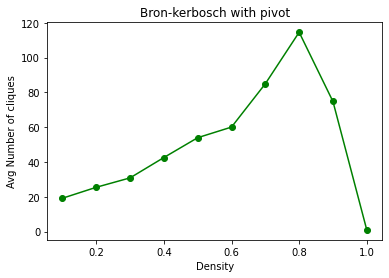

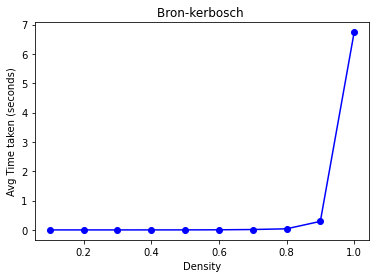

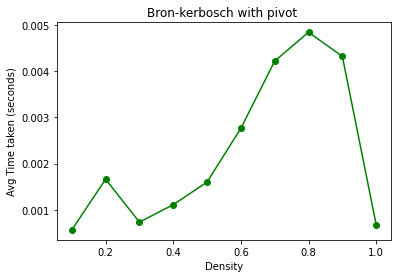

In [ ]:
plotter(clique_finder.density_to_cliques_2, 'Density', 'Avg Number of cliques', 'Bron-kerbosch with pivot', 'green')
plotter(clique_finder.density_to_time1, 'Density', 'Avg Time taken (seconds)', 'Bron-kerbosch ', 'blue')
plotter(clique_finder.density_to_time2, 'Density', 'Avg Time taken (seconds)', 'Bron-kerbosch with pivot ', 'green')